In [1]:
from __future__ import division

import os
import scipy as sp
import scipy.io
from scipy.optimize import minimize
import re
import nltk
from nltk import word_tokenize
from stemming.porter2 import stem
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline    

# 1 Support Vector Machines

In [2]:
dataset_1 = scipy.io.loadmat('ex6/ex6data1.mat')
dataset_2 = scipy.io.loadmat('ex6/ex6data2.mat')
dataset_3 = scipy.io.loadmat('ex6/ex6data3.mat')

In [3]:
from sklearn.svm import SVC # based on libsvm; see http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## 1.1 Example dataset 1

In [4]:
X_1 = dataset_1['X']
y_1 = dataset_1['y'].reshape(-1)   # Basically convert from column vector to row vector

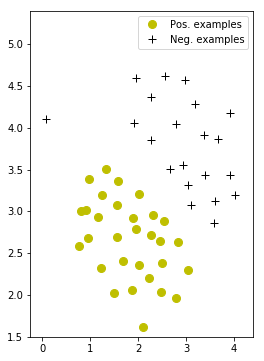

In [5]:
plt.figure(figsize=(4, 6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')  # X_1 has 2 cols. Transpose and take first row (1st col)
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.25, 4.4)
plt.ylim(1.5, 5.4)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig1.jpg')
plt.show()

In [6]:
clf = SVC(C=1, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
xs = sp.linspace(-1, 8)

# Calculate the decision boundary (y = ax - c where a = -w[0]/w[1] and c = intercept[0]/w[1])
b = clf.intercept_[0] # y-intercept
w_0 = clf.coef_[0, 0] # coefficient used to calculate a
w_1 = clf.coef_[0, 1] # coefficient used to calculate a and c
a = - w_0 / w_1
db_1 = a * xs - b / w_1 # The line (decision boundary) that is plotted below

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

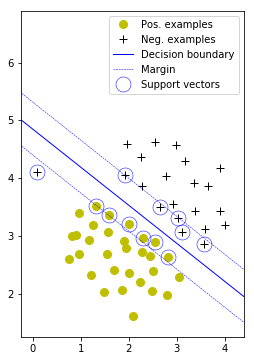

In [8]:
plt.figure(figsize=(4,6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig2.jpg')
plt.show()

In [9]:
clf = SVC(C=100, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
xs = sp.linspace(-1, 8)

# Calculate the decision boundary
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

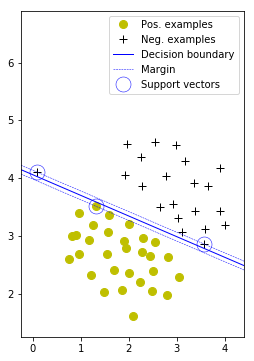

In [11]:
plt.figure(figsize=(4,6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig3.jpg')
plt.show()

## 1.2 SVM with Gaussian kernels

### 1.2.2 Example dataset 2

In [12]:
X_2 = dataset_2['X']
y_2 = dataset_2['y'].reshape(-1)

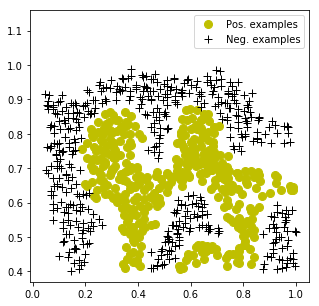

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig4.jpg')
plt.show()

In [14]:
sigma = 0.1
gamma = 1 / 2 / sigma**2
clf = SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, y_2) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Create an x_0 and x_1 linspace of 500 spaced evenly
x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
# Create a mesh grid of 500 x 500 for both x_0 and x_1
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
# Vertical stack the above two (raveled - 250000) and predict. Once done, reshape it to 500 x 500.
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape) # 500 x 500

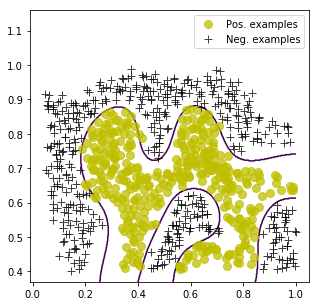

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0]) # Creates the non-linear decision boundary
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig5.jpg')
plt.show()

### 1.2.3 Example dataset 3

In [ ]:
X_3 = dataset_3['X']
y_3 = dataset_3['y'].reshape(-1)

X_val_3 = dataset_3['Xval']
y_val_3 = dataset_3['yval']

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.64, 0.35)
plt.ylim(-0.8, 0.95)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig6.jpg')
plt.show()

In [ ]:
vals = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
C_pts_mesh, sigma_pts_mesh = sp.meshgrid(vals, vals)
scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T
for i, (C, sigma) in enumerate(scores[:, :2]):
    gamma = 1 / 2 / sigma**2
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_3, y_3)
    scores[i, 2] = clf.score(X_val_3, y_val_3)

In [ ]:
highest_acc_index = scores[:, 2].argmax()
C, sigma = scores[highest_acc_index][:2]
gamma = 1 / 2 / sigma**2
clf = SVC(C=C, gamma=gamma, kernel='rbf')
clf.fit(X_3, y_3)

In [ ]:
x_0_pts, x_1_pts = sp.linspace(-0.64, 0.35, 500), sp.linspace(-0.8, 0.65, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0])
plt.xlim(-0.64, 0.35)
plt.ylim(-0.8, 0.95)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('ex6_ipynb_img/fig7.jpg')
plt.show()

# 2 Spam classification

In [ ]:
vocab_list = sp.loadtxt('ex6/vocab.txt', dtype='str')
vocab_index_dict = {row[1]: int(row[0]) for row in vocab_list}
index_vocab_dict = {int(row[0]): row[1] for row in vocab_list}

## 2.1 Preprocessing emails

In [ ]:
spam_train = scipy.io.loadmat('ex6/spamTrain.mat')
spam_test = scipy.io.loadmat('ex6/spamTest.mat')

In [ ]:
with open('ex6/emailSample1.txt', 'r') as f:
    email_contents_1 = f.read()

In [ ]:
print email_contents_1

### 2.1.1 Vocabulary list

In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
def process_email(email_contents, verbose=True):
    
    word_indices = []
    
    # Add code to strip headers here?
    
    email_contents = email_contents.lower()
    
    # Strip all HTML
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    
    # Handle Numbers
    email_contents = re.sub(r'[0-9]+', 'number', email_contents)
    
    # Handle URLS
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    
    # Handle $ sign
    email_contents = re.sub(r'[$]+', 'dollar', email_contents)
    
    # Handle punctuation and special ascii characters
    email_contents = re.sub(r'[@$/\\#,-:&*+=\[\]?!(){}\'\">_<;%]+', '', 
                            email_contents)    
    
    # Tokenize
    word_list = word_tokenize(email_contents)

    for i, word in enumerate(word_list):
        # Remove punctuation and non-alphanumeric characters.
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        
        # If remaining word length is zero, continue.
        if len(word) < 1:
            continue
            
        # Stem 
        try:
            word = stemmer.stem(word)
        except:
            continue
            
        if verbose == True:           
            print word,
            if (i+1) % 13 == 0: print '\r'
            
        try:
            word_indices.append(vocab_dict[word])
        except:
            continue

    if verbose == True: print ""
    
    return word_indices        

In [ ]:
word_indices_1 = process_email(email_contents_1)

In [ ]:
for i in [1, 2, 3, 86, 916, 1898, 1899]:
    print i, index_vocab_dict[i]
    if i in [3, 86, 916]:
        print '...' 

In [ ]:
for i, index in enumerate(word_indices_1):
    print index,
    if (i+1) % 5 == 0: print '\r'

## 2.2 Extracting features from emails

In [ ]:
def email_features(word_indices):
    features = sp.zeros(len(index_vocab_dict.keys()))
    for index in word_indices:
        features[index - 1] = 1
    return features

In [ ]:
features_1 = email_features(word_indices_1)

## 2.3 Training SVM for spam classification

In [ ]:
spam_train = scipy.io.loadmat('ex6/spamTrain.mat')
spam_test = scipy.io.loadmat('ex6/spamTest.mat')

In [ ]:
X_train = spam_train['X']
y_train = spam_train['y'].ravel()

X_test = spam_test['Xtest']
y_test = spam_test['ytest'].ravel()

In [ ]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train)
print 'training accuracy:', clf.score(X_train, y_train)
print 'test accuracy:', clf.score(X_test, y_test)

## 2.4 Top predictors for spam

In [ ]:
weights = clf.coef_.reshape(-1)
sorted_indices = sp.argsort(weights)[::-1]

In [ ]:
vocab_words = sp.loadtxt('ex6/vocab.txt', dtype='str').T[1]

In [ ]:
print 'top predictors of spam:'
for index in sorted_indices[:20]:
    print '%10s  %.2f' % (vocab_words[index], weights[index])

## 2.5 Try your own emails

In [ ]:
def email_classifier(file_name):
    with open(file_name, 'r') as f:
        email_contents = f.read()

    word_indices = process_email(email_contents, verbose=False)
    features = email_features(word_indices)
    print ""
    print "CLASSIFICATION: ", "SPAM" if clf.predict(features.reshape(1, -1))[0] else "HAM"
    
    pass

Classify emailSample1.txt. 

In [ ]:
print "CLASSIFICATION: ", "SPAM" if clf.predict(features_1.reshape(1, -1))[0] else "HAM"

Classify emailSample2.txt.

In [ ]:
email_classifier('ex6/emailSample2.txt')

Classify spamSample1.txt.

In [ ]:
email_classifier('ex6/spamSample1.txt')

Classify spamSample2.txt.

In [ ]:
email_classifier('ex6/spamSample2.txt')

## 2.6 Build your own dataset

In [ ]:
ham_dirs = ['easy_ham', 'easy_ham_2', 'hard_ham']
spam_dirs = ['spam', 'spam_2']

In [ ]:
X = []
for folder in ham_dirs:
    directory = 'spamassassin_public_corpus/' + folder + '/'
    files = os.listdir(directory)
    for file_name in files:
        if file_name == '.DS_Store': continue
        with open(directory + file_name, 'r') as f:
            email_contents = f.read()
        email_contents = re.split(r'[\n]{2}', email_contents, maxsplit=1)[-1]
        word_indices = process_email(email_contents, verbose=False)
        features = email_features(word_indices)
        X.append(features)

# Note: This code takes ~10s to run on my laptop.        

In [ ]:
y_ham = sp.zeros(len(X))

In [ ]:
for folder in spam_dirs:
    directory = 'spamassassin_public_corpus/' + folder + '/'
    files = os.listdir(directory)
    for file_name in files:
        if file_name == '.DS_Store': continue
        with open(directory + file_name, 'r') as f:
            email_contents = f.read()
        email_contents = re.split(r'[\n]{2}', email_contents, maxsplit=1)[-1]
        word_indices = process_email(email_contents, verbose=False)
        features = email_features(word_indices)
        X.append(features)

In [ ]:
y_spam = sp.ones(len(X) - len(y_ham))

In [ ]:
X = sp.asarray(X)
y = sp.concatenate((y_ham, y_spam))

M = len(y)

In [ ]:
indices = sp.arange(M)
sp.random.shuffle(indices)

train_index_low, train_index_high = 0, int(0.7 * M)
val_index_low, val_index_high = int(0.7 * M), int(0.9 * M)
test_index_low, test_index_high = int(0.9 * M), M

X_train = X[indices[train_index_low:train_index_high]]
y_train = y[indices[train_index_low:train_index_high]]

X_val = X[indices[val_index_low:val_index_high]]
y_val = y[indices[val_index_low:val_index_high]]

X_test = X[indices[test_index_low:test_index_high]]
y_test = y[indices[test_index_low:test_index_high]]

In [ ]:
Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
scores = sp.zeros(len(Cs))
for i, C in enumerate(Cs):
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train, y_train)
    scores[i] = clf.score(X_val, y_val)

In [ ]:
highest_acc_index = scores.argmax()
C = Cs[highest_acc_index]
clf = SVC(C=C, kernel='linear')
clf.fit(X_train, y_train)
print 'training accuracy:', clf.score(X_train, y_train)
print 'validation accuracy:', scores[highest_acc_index]
print 'test accuracy:', clf.score(X_test, y_test)

In [ ]:
weights = clf.coef_.reshape(-1)
sorted_indices = sp.argsort(weights)[::-1]

In [ ]:
print 'top predictors of spam:'
for index in sorted_indices[:20]:
    print '%10s  %.2f' % (vocab_words[index], weights[index])

Classify emailSample1.txt. 

In [ ]:
print "CLASSIFICATION: ", "SPAM" if clf.predict(features_1.reshape(1, -1))[0] else "HAM"

Classify emailSample2.txt.

In [ ]:
email_classifier('ex6/emailSample2.txt')

Classify spamSample1.txt.

In [ ]:
email_classifier('ex6/spamSample1.txt')

Classify spamSample2.txt.

In [ ]:
email_classifier('ex6/spamSample2.txt')